In [101]:
import tensorflow as tf

In [102]:
import matplotlib.pyplot as plt

In [103]:
mnist = tf.keras.datasets.mnist

In [104]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [105]:
x_train, x_test = x_train/255.0, x_test/255.0

In [106]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

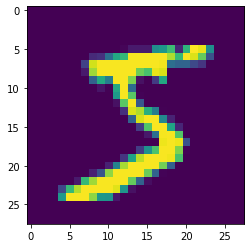

In [107]:
plt.imshow(x_train[0])

In [108]:
print(y_train[0])

5


In [109]:
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)

In [110]:
y_train[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)>

In [111]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(50)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(50)

In [112]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28), dtype=tf.float64, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [113]:
print(train_ds)

<BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28), dtype=tf.float64, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>


In [114]:
x_train.shape


(60000, 28, 28)

In [115]:
from tensorflow.keras.layers import Flatten

In [116]:
flatten = Flatten(dtype="float32")

In [117]:
flatten(x_train)

<tf.Tensor: shape=(60000, 784), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [118]:
x_train


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [119]:
x_train.shape


(60000, 28, 28)

In [132]:
weights = tf.Variable(tf.zeros([784, 10], tf.float32))
biases = tf.Variable(tf.zeros([10], tf.float32))

In [121]:
bias

<tf.Variable 'Variable:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [122]:
def activate_fwd(x):
    return tf.matmul(x, weights) + biases

In [123]:
def activations(x):
    return tf.nn.softmax(activate_fwd(x))

In [124]:
def perform_network(a):
    a = flatten(a)
    return activations(a)

In [145]:
def loss(true, pred):
    return (-tf.reduce_sum(true*tf.math.log(pred + 1e-8)))

In [146]:
grad_desc = tf.keras.optimizers.SGD(learning_rate=0.3)

In [147]:
def train_network(inp_x, exp_y):
    with tf.GradientTape() as tape:
        curr_loss = loss(exp_y, perform_network(inp_x))
        grads = tape.gradient(curr_loss, [weights, biases])
        grad_desc.apply_gradients(zip(grads, [weights, biases]))
    return curr_loss.numpy()
    

In [150]:

epochs = 4

In [155]:
for i in range(epochs):
    j = 0
    for x_batch_train, y_batch_train in train_ds:
        j += 1
        curr_loss = train_network(x_batch_train, y_batch_train)
        if j % 500 == 0: 
            print(f'epoch {i} training, loss: {curr_loss}, batch: {j}')
    
    curr_loss = loss(y_train, perform_network(x_train))
    is_pred_correct = tf.equal(tf.argmax(perform_network(x_train), axis=1), tf.argmax(y_train, axis=1))
    accuracy = tf.reduce_mean(tf.cast(is_pred_correct, tf.float32)).numpy()
    print(f"epoch {i} ended, loss: {curr_loss}, accuracy: {accuracy}")

epoch 0 trained, loss: 159.80368041992188, batch: 500
epoch 0 trained, loss: 148.54116821289062, batch: 1000
epoch 0 ended, loss: 169804.546875, accuracy: 0.8356833457946777
epoch 1 trained, loss: 165.78411865234375, batch: 500
epoch 1 trained, loss: 143.1540985107422, batch: 1000
epoch 1 ended, loss: 169145.015625, accuracy: 0.836650013923645
epoch 2 trained, loss: 132.17379760742188, batch: 500
epoch 2 trained, loss: 131.56932067871094, batch: 1000
epoch 2 ended, loss: 172277.375, accuracy: 0.8325833082199097
epoch 3 trained, loss: 131.9173126220703, batch: 500
epoch 3 trained, loss: 131.70399475097656, batch: 1000
epoch 3 ended, loss: 166224.421875, accuracy: 0.8399999737739563


In [151]:
is_pred_correct = tf.equal?